In [1]:
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from math import *
from scipy.optimize import curve_fit

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preamble'] = r"\usepackage[russian]{babel}"
matplotlib.rcParams['font.family'] = "serif"
matplotlib.rcParams['font.serif'] = "Computer Modern"
matplotlib.rcParams['font.size'] = 14

In [2]:
def GetSet(filename):
    retY = np.zeros(0, dtype=np.longdouble)
    with open(filename, 'r') as file:
        while True:
            line = file.readline().rstrip()
            if not line:
                break
            retY = np.append(retY, int(line))
    retX = np.arange(1, len(retY) + 1, 1)
    return retX, retY

In [3]:
gC = 0
def SqrtExpPart(x, a, b):
    global gC
    return a * (1/np.power(x, gC)) * np.exp(b * np.sqrt(x))

# РАНГ

In [4]:
def KargConject1(n):
    lambdaVal = np.sqrt(n - (1/24))
    return np.exp((np.pi * lambdaVal) / np.sqrt(6)) / (4 * np.power(lambdaVal, 3/2) * np.power(24, 1/4))

In [5]:
def KargConject2(n):
    return np.exp(np.pi * np.sqrt(n/6)) / (4 * np.power(24, 1/4) * np.power(n, 3/4))

In [6]:
rankX, rankY = GetSet("../rank_out.txt")
kargY1 = np.zeros(0, np.longdouble)
kargY2 = np.zeros(0, np.longdouble)
for x in rankX:
    kargY1 = np.append(kargY1, np.round(KargConject1(x)))
    kargY2 = np.append(kargY2, np.round(KargConject2(x)))

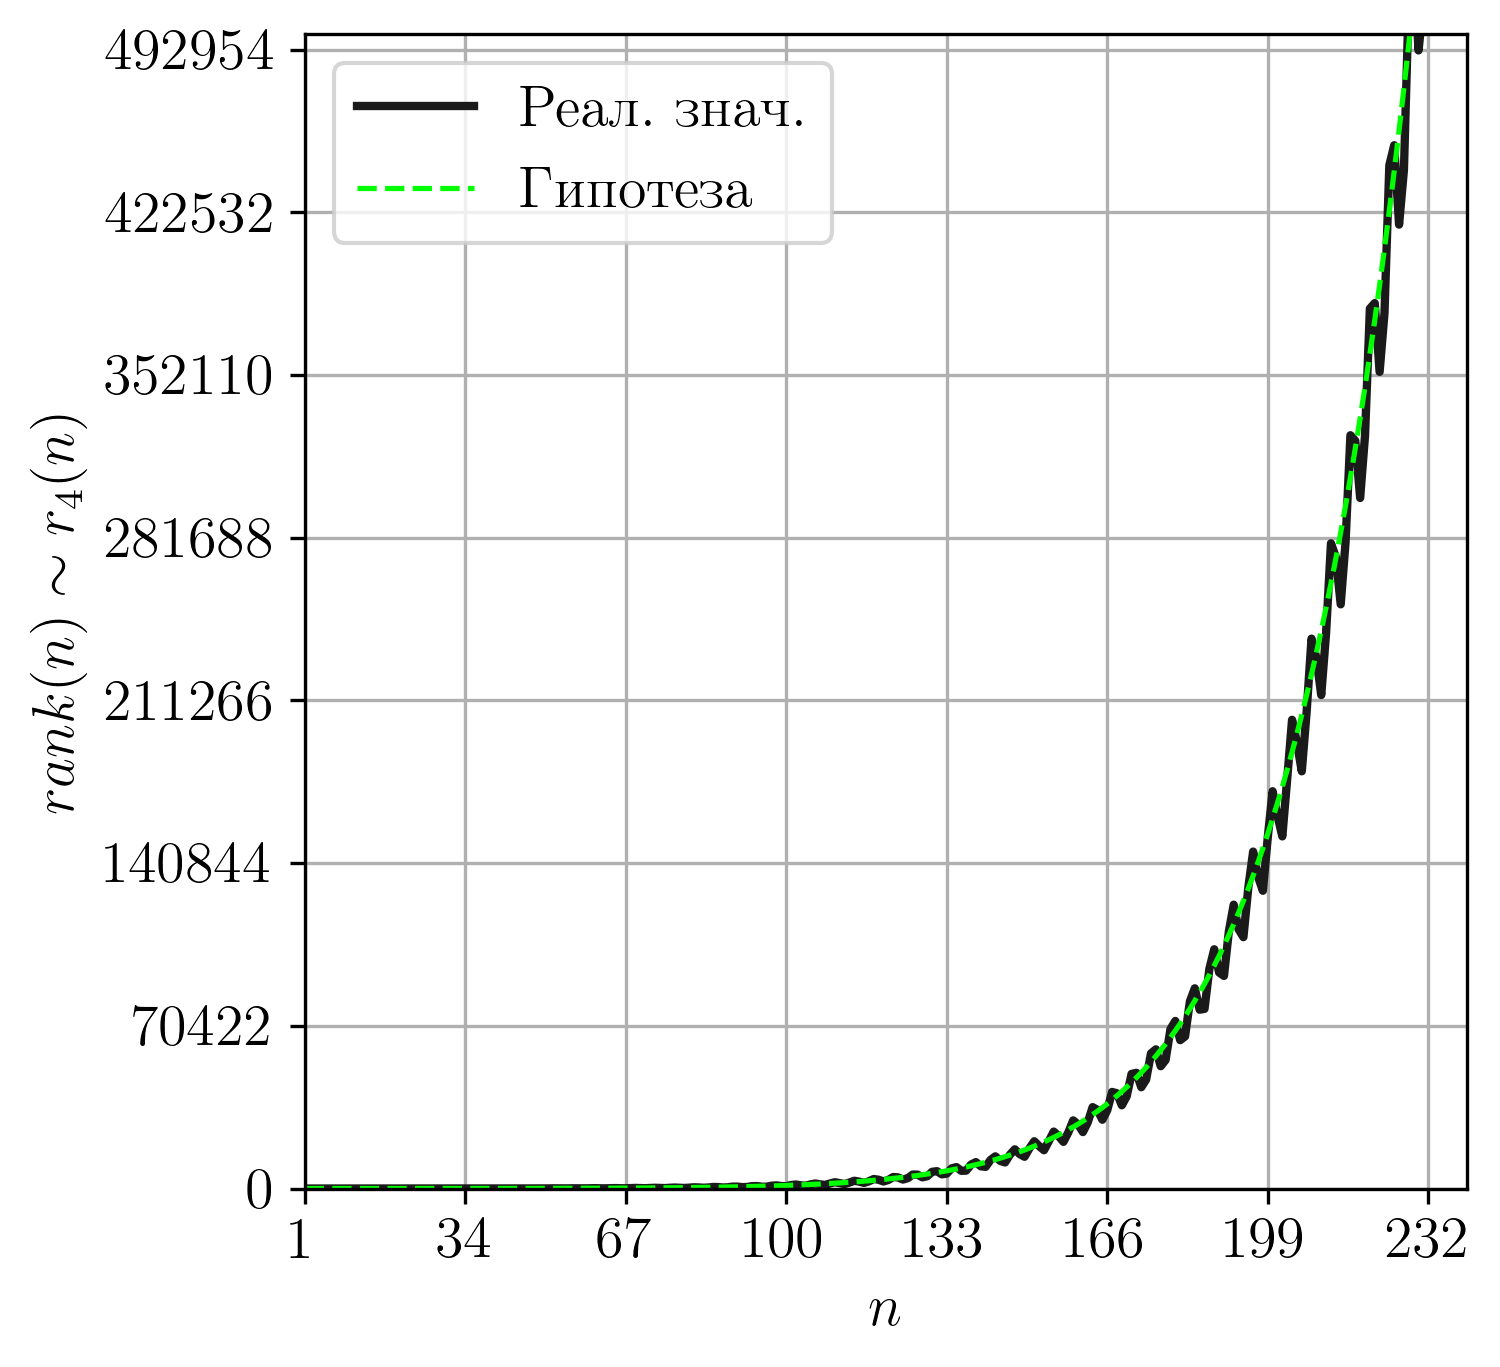

In [7]:
maxX1 = 1
maxY1 = 0
maxX2 = 240 
maxY2 = 500000

step1X = (maxX2 - maxX1) // 7.1
step1Y = (maxY2 - maxY1) // 7.1

if step1X < 1:
    step1X = 1

if step1Y < 1:
    step1Y = 1
    
fig, ax = plt.subplots(figsize=(5, 5), dpi=300)
ax.set_xlim([maxX1, maxX2])
ax.set_ylim([maxY1, maxY2])
ax.xaxis.set_ticks(np.arange(maxX1, maxX2 + 1, step1X))
ax.yaxis.set_ticks(np.arange(maxY1, maxY2 + 1, step1Y))
ax.set_xlabel('$n$')
ax.set_ylabel('$rank(n)\sim r_4(n)$')
ax.plot(rankX, rankY, linewidth=2, color=(0.1, 0.1, 0.1), label='Реал. знач.')
ax.plot(rankX, kargY2, linewidth=1.25, linestyle='--', color=(0, 1, 0), label='Гипотеза')
ax.grid(True)
ax.legend()

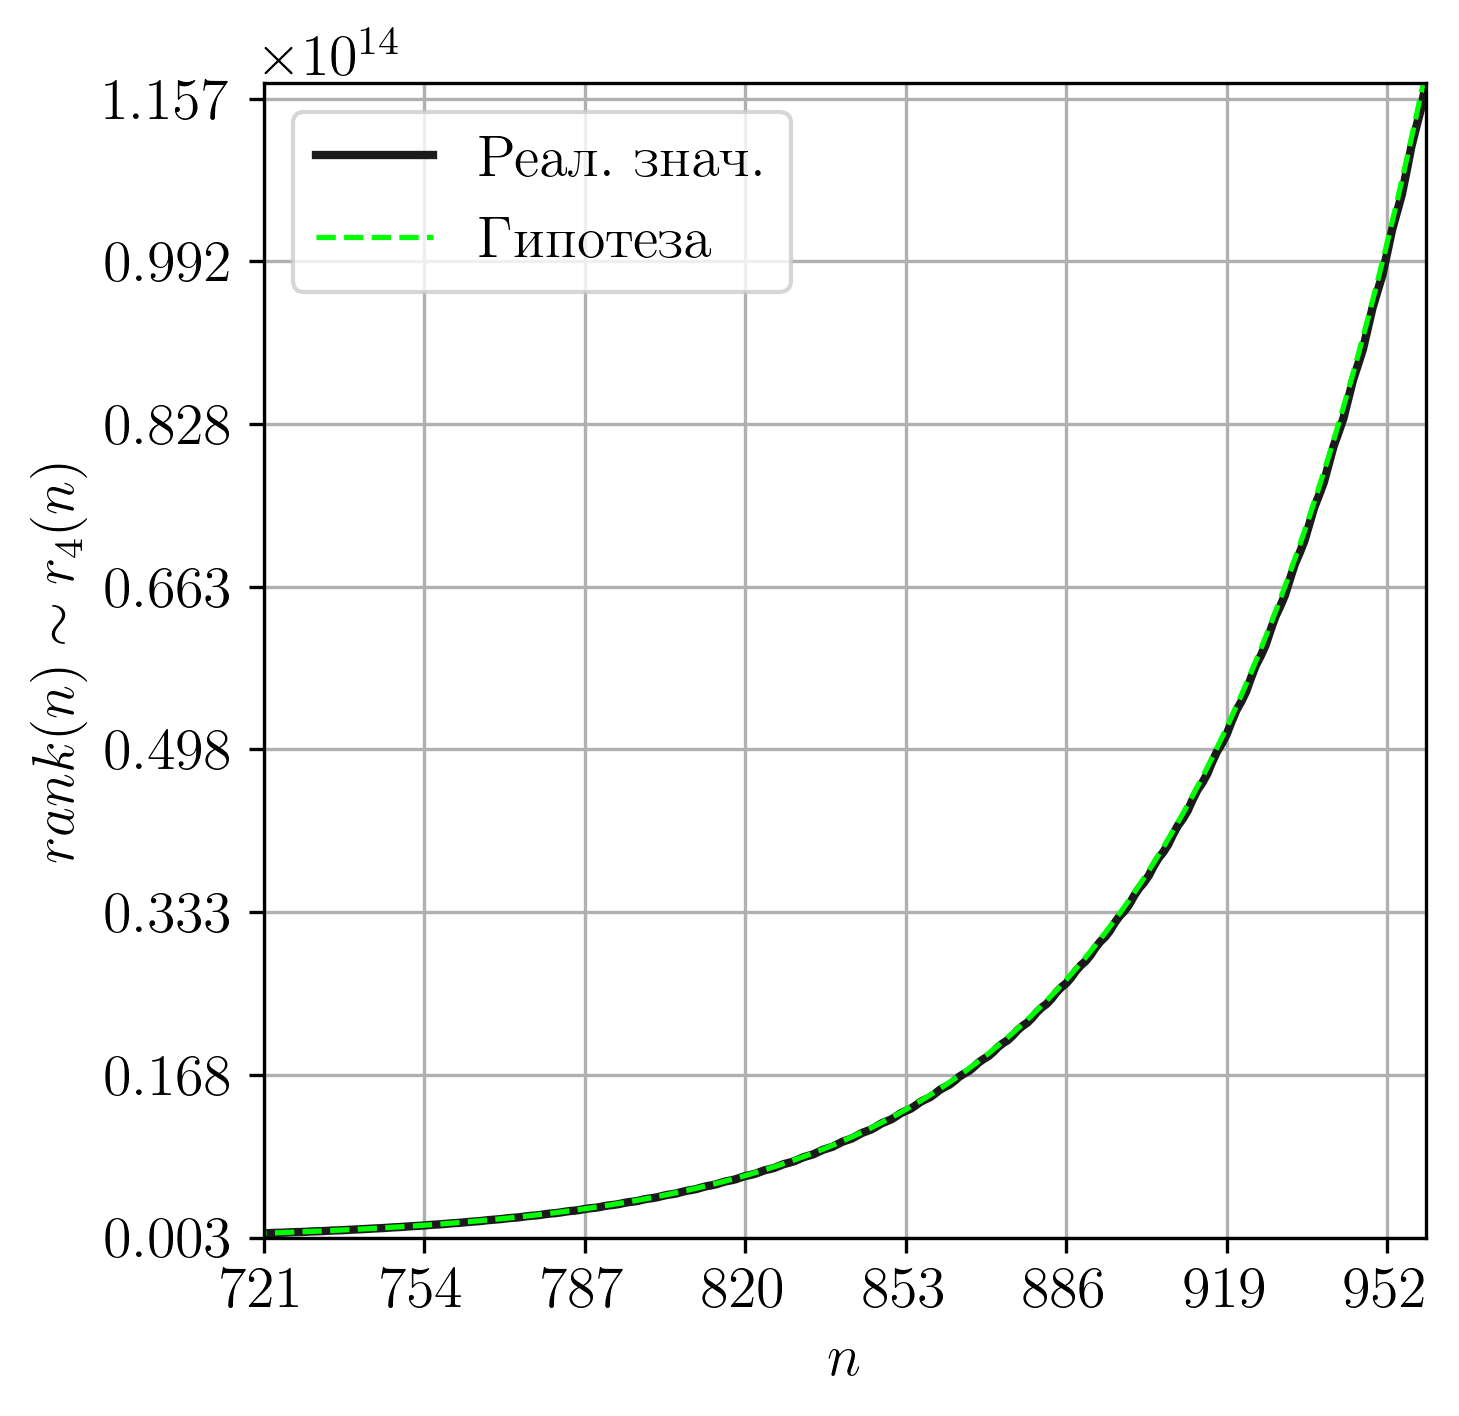

In [8]:
maxX1 = 721
maxY1 = 300000000000
maxX2 = 960 
maxY2 = int(np.max(rankY))

step1X = (maxX2 - maxX1) // 7.1
step1Y = (maxY2 - maxY1) // 7.1

if step1X < 1:
    step1X = 1

if step1Y < 1:
    step1Y = 1
    
fig, ax = plt.subplots(figsize=(5, 5), dpi=300)
ax.set_xlim([maxX1, maxX2])
ax.set_ylim([maxY1, maxY2])
ax.xaxis.set_ticks(np.arange(maxX1, maxX2 + 1, step1X))
ax.yaxis.set_ticks(np.arange(maxY1, maxY2 + 1, step1Y))
ax.set_xlabel('$n$')
ax.set_ylabel('$rank(n)\sim r_4(n)$')
ax.plot(rankX, rankY, linewidth=2, color=(0.1, 0.1, 0.1), label='Реал. знач.')
ax.plot(rankX, kargY2, linewidth=1.25, linestyle='--', color=(0, 1, 0), label='Гипотеза')

scale_factor = 10**14
fmt = matplotlib.ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_factor))
#ax.yaxis.set_major_formatter(fmt)

ax.grid(True)
ax.legend()

In [9]:
data = np.zeros(0)
for i, item in enumerate(rankX):
    data = np.append(data, item)
    
    if int(kargY1[i]) == int(rankY[i]):
        data = np.append(data, float('{:.2f}'.format(0)))  
    elif int(rankY[i]) == 0:
        data = np.append(data, float('{:.2f}'.format(100)))
    else:
        data = np.append(data, float('{:.2f}'.format((100 * abs(int(kargY1[i]) - int(rankY[i]))) / int(rankY[i]))))
        
    if int(kargY2[i]) == int(rankY[i]):
        data = np.append(data, float('{:.2f}'.format(0)))  
    elif int(rankY[i]) == 0:
        data = np.append(data, float('{:.2f}'.format(100)))
    else:
        data = np.append(data, float('{:.2f}'.format((100 * abs(int(kargY2[i]) - int(rankY[i]))) / int(rankY[i]))))

data = data.reshape(len(rankX), 3)
df = pd.DataFrame(data, columns=['n', 'Гипотеза 1, %', 'Гипотеза 2, %'])
df

,n,"Гипотеза 1, %","Гипотеза 2, %"
0,1.0,0.00,0.00
1,2.0,0.00,0.00
2,3.0,0.00,0.00
3,4.0,100.00,100.00
4,5.0,0.00,0.00
5,6.0,0.00,0.00
6,7.0,100.00,100.00
7,8.0,100.00,100.00
8,9.0,100.00,100.00
9,10.0,0.00,0.00


In [10]:
PERx = np.zeros(0)
PER1 = np.zeros(0)

f = 0
for i, item in enumerate(rankX):
    f = f + 1
    if f != 1:
        if f > 6:
            f = 0
        continue
        
    PERx = np.append(PERx, item)
    if int(kargY2[i]) == int(rankY[i]):
        PER1 = np.append(PER1, float('{:.2f}'.format(0)))  
    elif int(rankY[i]) == 0:
        PER1 = np.append(PER1, float('{:.2f}'.format(100)))
    else:
        PER1 = np.append(PER1, float('{:.2f}'.format((100 * abs(int(kargY2[i]) - int(rankY[i]))) / int(rankY[i]))))

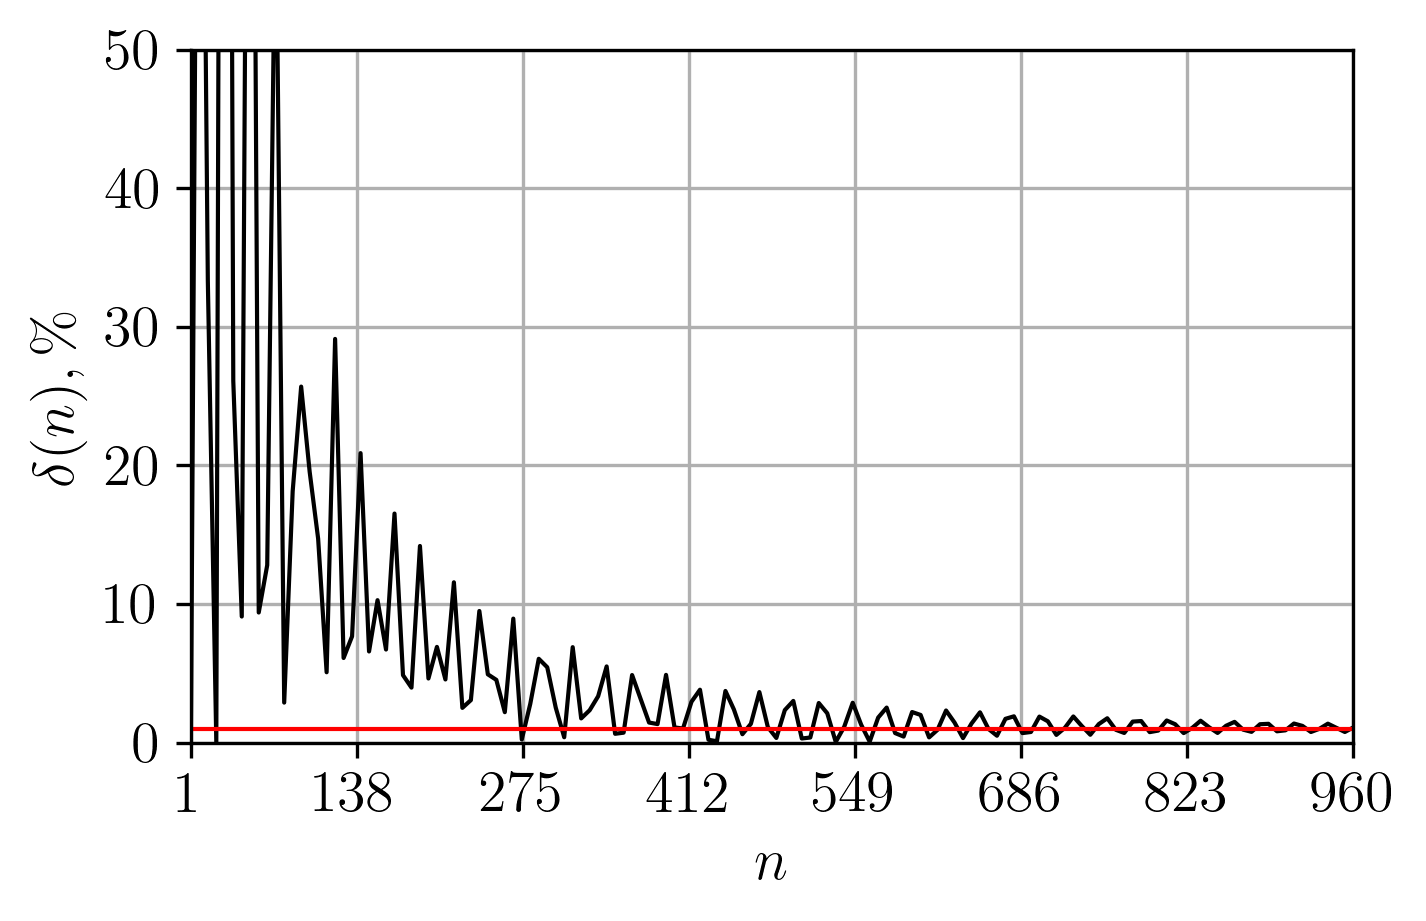

In [11]:
maxX1 = 1
maxY1 = 0
maxX2 = 960  
maxY2 = 50

step1X = (maxX2 - maxX1) // 7
step1Y = (maxY2 - maxY1) // 5

if step1X < 1:
    step1X = 1

if step1Y < 1:
    step1Y = 1
    
fig, ax = plt.subplots(figsize=(5, 3), dpi=300)
ax.set_xlim([maxX1, maxX2])
ax.set_ylim([maxY1, maxY2])
ax.xaxis.set_ticks(np.arange(maxX1, maxX2 + 1, step1X))
ax.yaxis.set_ticks(np.arange(maxY1, maxY2 + 1, step1Y))
ax.set_xlabel('$n$')
ax.set_ylabel('$\delta(n), \%$')
ax.plot(PERx, PER1, linewidth=1, color=(0, 0, 0))
ax.plot((0, 960), (1, 1), linewidth=1, color=(1, 0, 0))
ax.grid(True)

# Аппроксимация QOP

In [12]:
qopX, qopY = GetSet("../qop_out.txt")
gC = 1.449
[a, b], res1 = curve_fit(SqrtExpPart, qopX, qopY)
qopYa = a * (1/np.power(qopX, gC)) * np.exp(b * np.sqrt(qopX))
print(a, b)

0.4296509328165734 0.9997658657514948


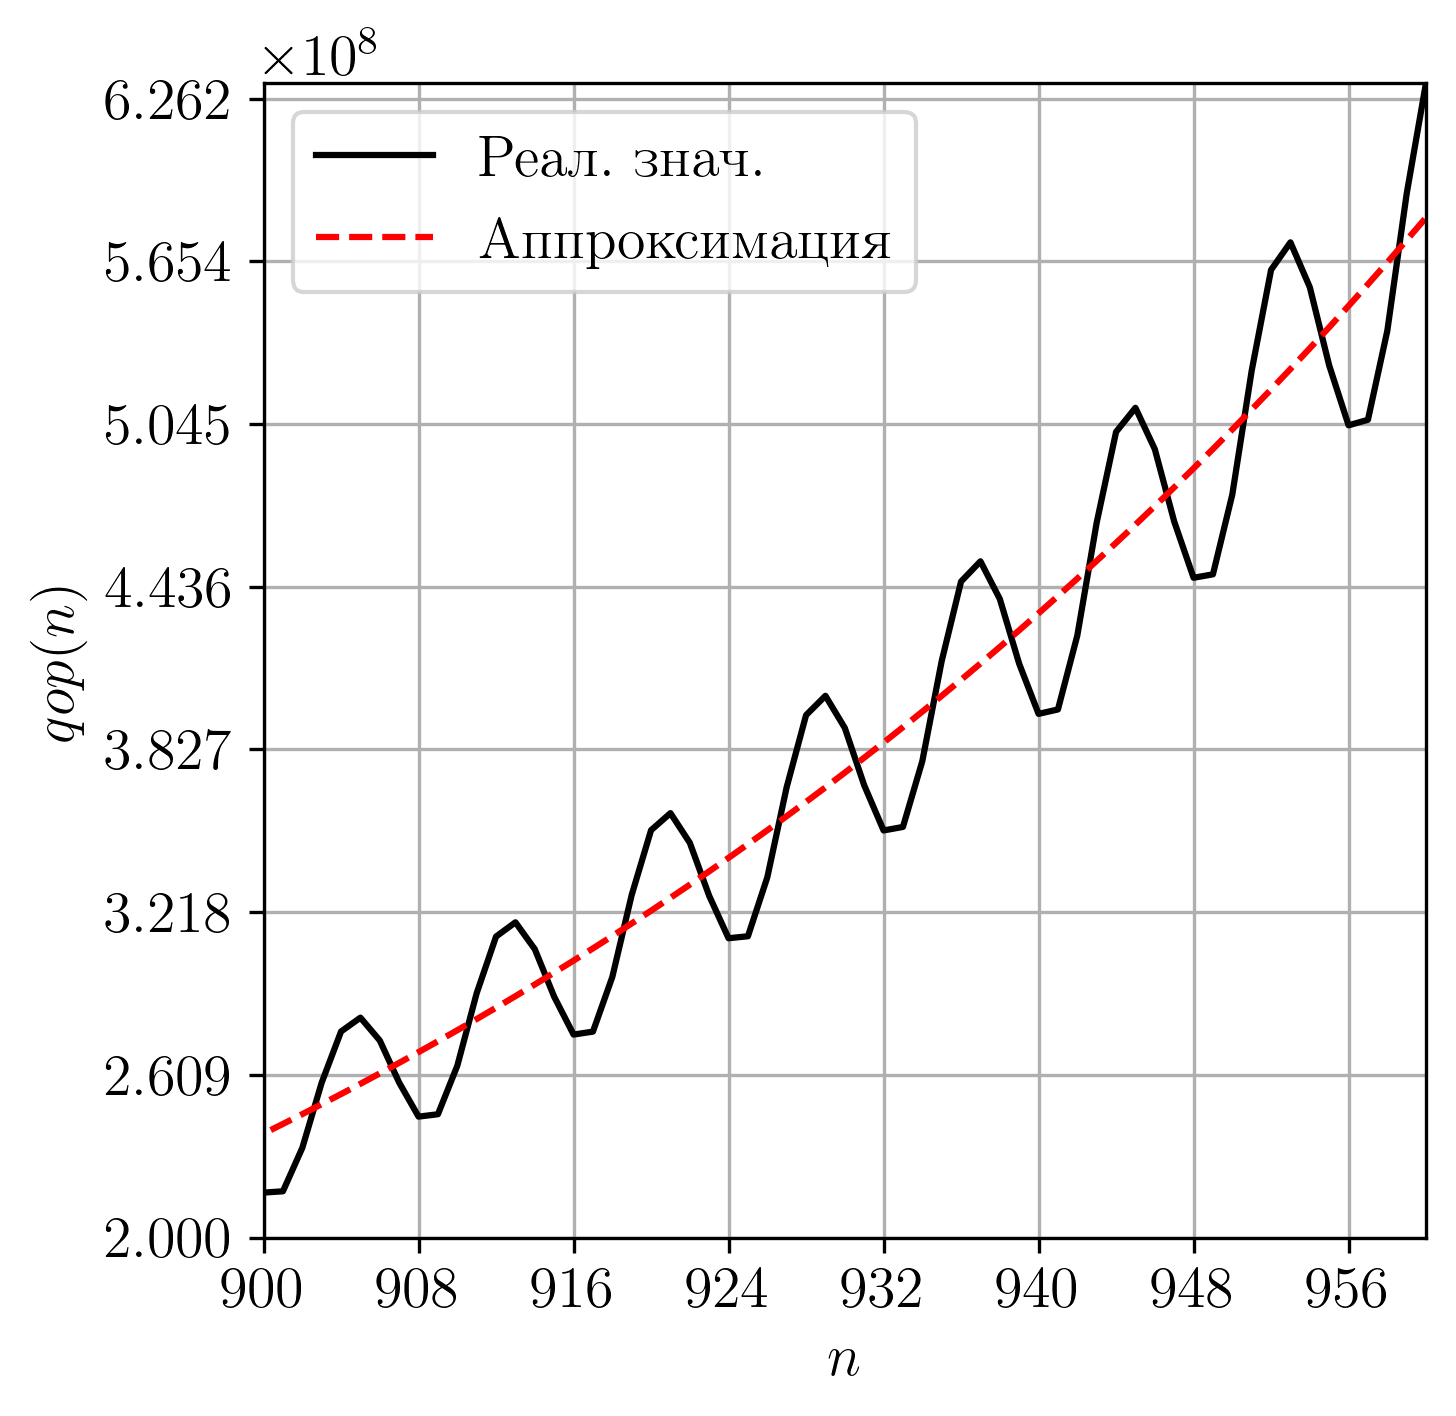

In [13]:
maxX1 = 900
maxY1 = 200000000
maxX2 = int(np.max(qopX))    
maxY2 = int(np.max(qopY))

step1X = (maxX2 - maxX1) // 7.1
step1Y = (maxY2 - maxY1) // 7.1

if step1X < 1:
    step1X = 1

if step1Y < 1:
    step1Y = 1
    
fig, ax = plt.subplots(figsize=(5, 5), dpi=300)
ax.set_xlim([maxX1, maxX2])
ax.set_ylim([maxY1, maxY2])
ax.xaxis.set_ticks(np.arange(maxX1, maxX2 + 1, step1X))
ax.yaxis.set_ticks(np.arange(maxY1, maxY2 + 1, step1Y))
ax.set_xlabel('$n$')
ax.set_ylabel('$qop(n)$')
ax.plot(qopX, qopY, linewidth=1.5, color=(0, 0, 0), label='Реал. знач.')
ax.plot(qopX, qopYa, linewidth=1.5, linestyle='--', color=(1, 0, 0), label='Аппроксимация')
ax.grid(True)
ax.legend()

In [14]:
data = np.zeros(0)
for i, item in enumerate(qopX):
    data = np.append(data, item)
    
    if int(qopYa[i]) == int(qopY[i]):
        data = np.append(data, float('{:.2f}'.format(0)))  
    elif int(qopY[i]) == 0:
        data = np.append(data, float('{:.2f}'.format(100)))
    else:
        data = np.append(data, float('{:.2f}'.format((100 * abs(int(qopYa[i]) - int(qopY[i]))) / int(qopY[i]))))

data = data.reshape(len(qopX), 2)
df = pd.DataFrame(data, columns=['n', 'Аппроксимация, %'])
df

,n,"Аппроксимация, %"
0,1.0,0.00
1,2.0,0.00
2,3.0,0.00
3,4.0,0.00
4,5.0,0.00
5,6.0,0.00
6,7.0,0.00
7,8.0,0.00
8,9.0,100.00
9,10.0,100.00


In [15]:
KRx = np.zeros(0)
KR = np.zeros(0)

f = 0
for i, item in enumerate(qopX):
    f = f + 1
    if f != 1:
        if f > 6:
            f = 0
        continue
        
    KRx = np.append(KRx, item)
    if int(qopYa[i]) == int(qopY[i]):
        KR = np.append(KR, float('{:.2f}'.format(0)))  
    elif int(qopY[i]) == 0:
        KR = np.append(KR, float('{:.2f}'.format(100)))
    else:
        KR = np.append(KR, float('{:.2f}'.format((100 * abs(int(qopYa[i]) - int(qopY[i]))) / int(qopY[i]))))

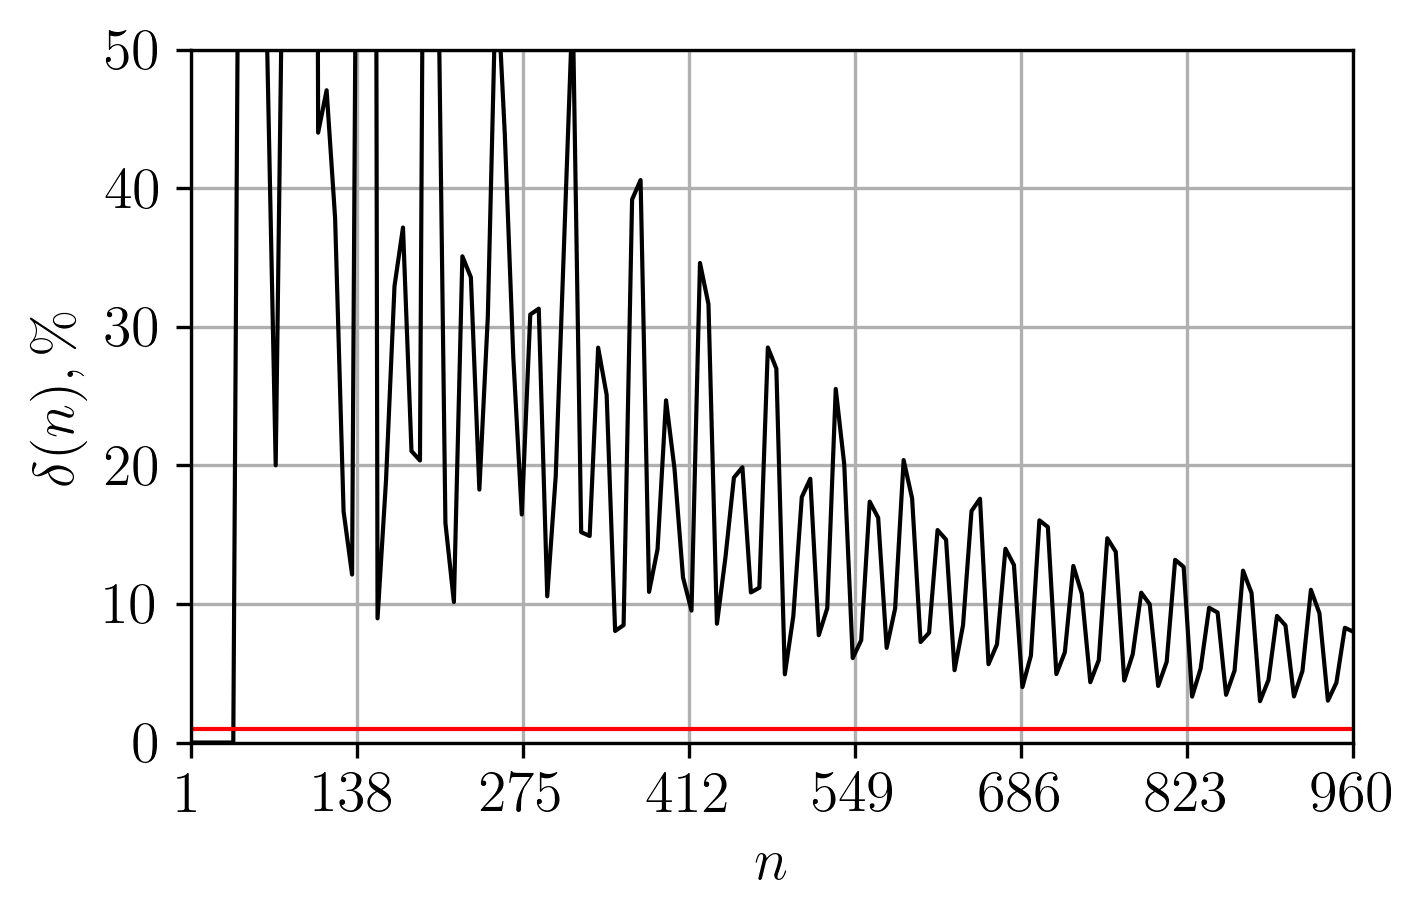

In [16]:
maxX1 = 1
maxY1 = 0
maxX2 = 960  
maxY2 = 50

step1X = (maxX2 - maxX1) // 7
step1Y = (maxY2 - maxY1) // 5

if step1X < 1:
    step1X = 1

if step1Y < 1:
    step1Y = 1
    
fig, ax = plt.subplots(figsize=(5, 3), dpi=300)
ax.set_xlim([maxX1, maxX2])
ax.set_ylim([maxY1, maxY2])
ax.xaxis.set_ticks(np.arange(maxX1, maxX2 + 1, step1X))
ax.yaxis.set_ticks(np.arange(maxY1, maxY2 + 1, step1Y))
ax.set_xlabel('$n$')
ax.set_ylabel('$\delta(n), \%$')
ax.plot(KRx, KR, linewidth=1, color=(0, 0, 0))
ax.plot((0, 960), (1, 1), linewidth=1, color=(1, 0, 0))
ax.grid(True)

# Разбиение QOP

In [17]:
xMod = np.zeros((8, 120), dtype=np.uint64)
yMod = np.zeros((8, 120), dtype=np.uint64)
for j in range(8):
    k = 0
    for i in range(len(qopX)):
        if (qopX[i] % 8) == j:
            xMod[j][k] = qopX[i]
            yMod[j][k] = qopY[i]
            k = k + 1

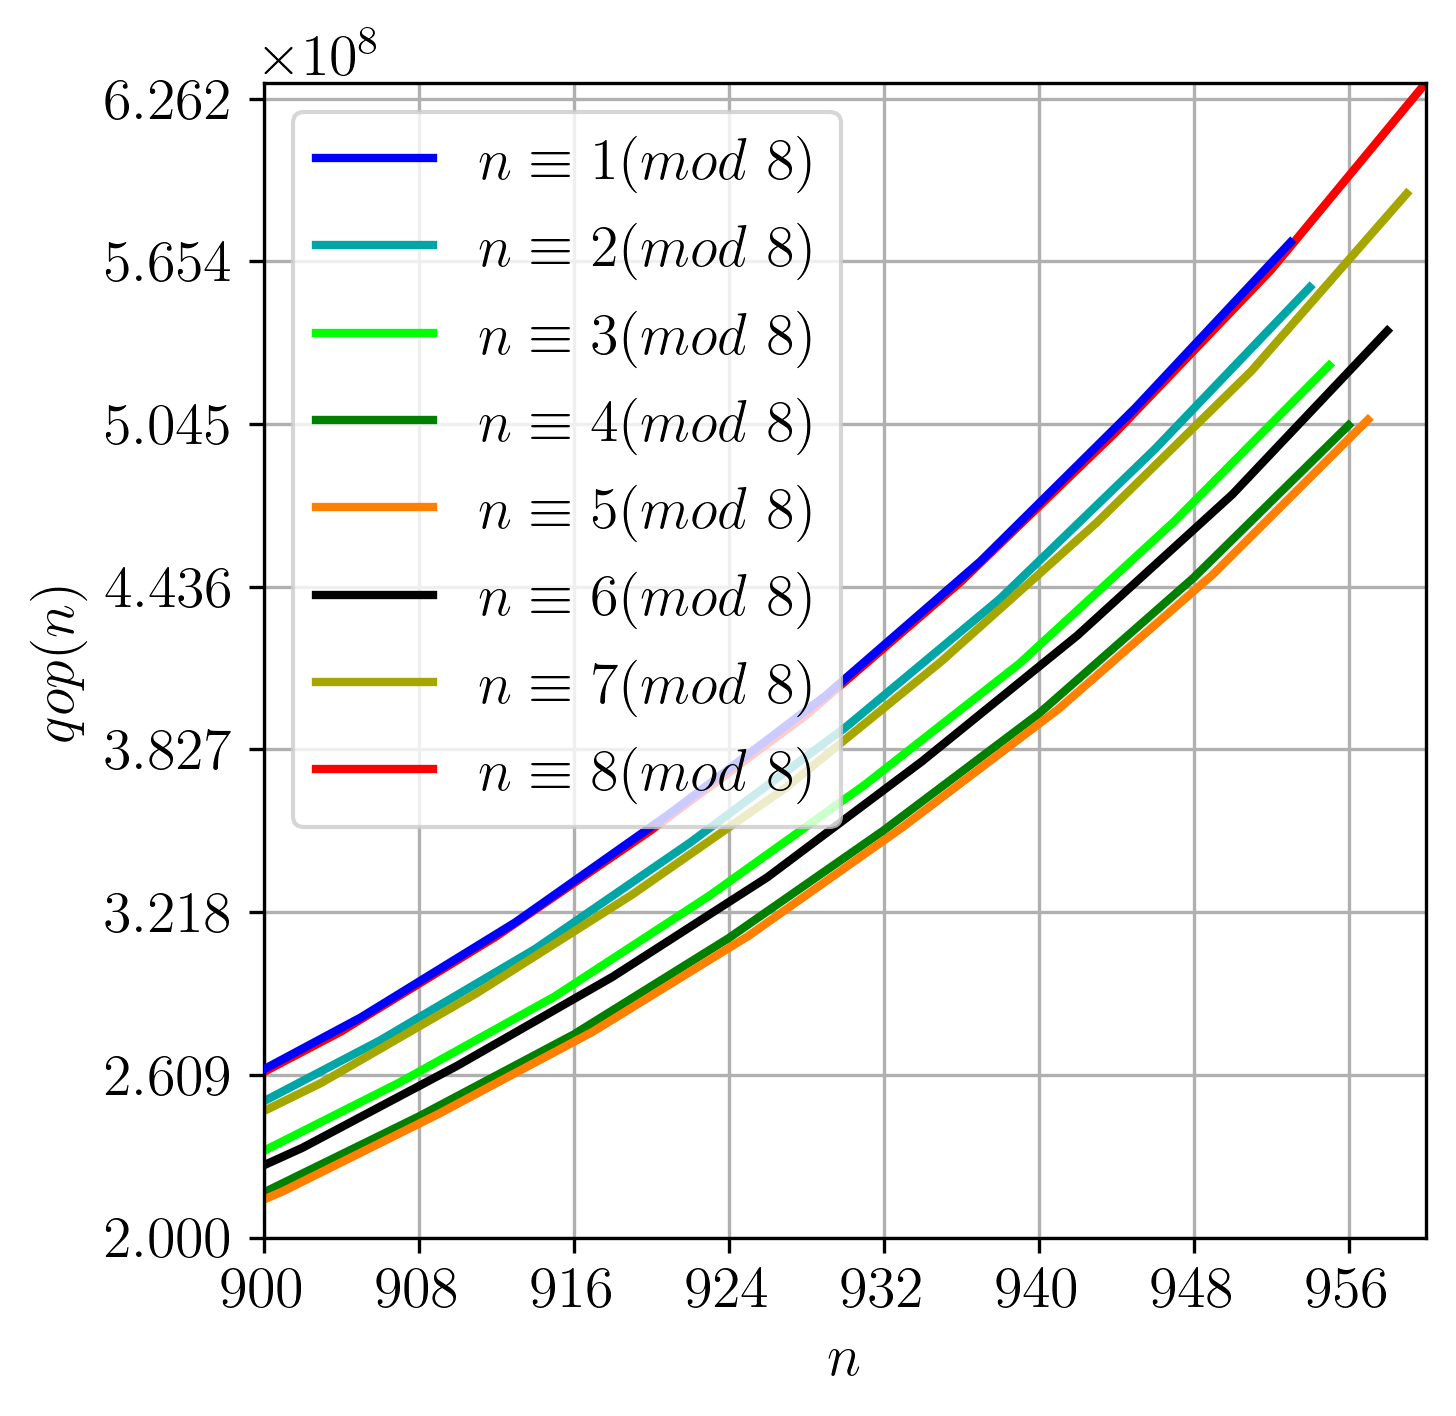

In [18]:
maxX1 = 900
maxY1 = 200000000
maxX2 = int(np.max(qopX))    
maxY2 = int(np.max(qopY))

step1X = (maxX2 - maxX1) // 7.1
step1Y = (maxY2 - maxY1) // 7.1

if step1X < 1:
    step1X = 1

if step1Y < 1:
    step1Y = 1
    
fig, ax = plt.subplots(figsize=(5, 5), dpi=300)
ax.set_xlim([maxX1, maxX2])
ax.set_ylim([maxY1, maxY2])
ax.xaxis.set_ticks(np.arange(maxX1, maxX2 + 1, step1X))
ax.yaxis.set_ticks(np.arange(maxY1, maxY2 + 1, step1Y))
ax.set_xlabel('$n$')
ax.set_ylabel('$qop(n)$')
ax.plot(xMod[1], yMod[1], linewidth=2, color=(0, 0, 1), label='$n \equiv 1 (mod~8)$', zorder=3)
ax.plot(xMod[2], yMod[2], linewidth=2, color=(0, 0.65, 0.65), label='$n \equiv 2 (mod~8)$')
ax.plot(xMod[3], yMod[3], linewidth=2, color=(0, 1, 0), label='$n \equiv 3 (mod~8)$')
ax.plot(xMod[4], yMod[4], linewidth=2, color=(0, 0.5, 0), label='$n \equiv 4 (mod~8)$')
ax.plot(xMod[5], yMod[5], linewidth=2, color=(1, 0.5, 0), label='$n \equiv 5 (mod~8)$')
ax.plot(xMod[6], yMod[6], linewidth=2, color=(0, 0, 0), label='$n \equiv 6 (mod~8)$')
ax.plot(xMod[7], yMod[7], linewidth=2, color=(0.65, 0.65, 0), label='$n \equiv 7 (mod~8)$')
ax.plot(xMod[0], yMod[0], linewidth=2, color=(1, 0, 0), label='$n \equiv 8 (mod~8)$')
ax.grid(True)
ax.legend()

# Аппроксимация разбиений QOP

In [19]:
q1X = np.zeros(0, dtype=np.longdouble)
q1Y = np.zeros(0, dtype=np.longdouble)
for i in range(len(qopX)):
    if (qopX[i] % 8) == 0:
        q1X = np.append(q1X, qopX[i])
        q1Y = np.append(q1Y, qopY[i])
      
    if (qopX[i] % 8) == 1:
        q1X = np.append(q1X, qopX[i])
        q1Y = np.append(q1Y, qopY[i])
        
q2X = np.zeros(0, dtype=np.longdouble)
q2Y = np.zeros(0, dtype=np.longdouble)
for i in range(len(qopX)):
    if (qopX[i] % 8) == 2:
        q2X = np.append(q2X, qopX[i])
        q2Y = np.append(q2Y, qopY[i])
      
    if (qopX[i] % 8) == 7:
        q2X = np.append(q2X, qopX[i])
        q2Y = np.append(q2Y, qopY[i])
        
q3X = np.zeros(0, dtype=np.longdouble)
q3Y = np.zeros(0, dtype=np.longdouble)
for i in range(len(qopX)):
    if (qopX[i] % 8) == 3:
        q3X = np.append(q3X, qopX[i])
        q3Y = np.append(q3Y, qopY[i])
      
    if (qopX[i] % 8) == 6:
        q3X = np.append(q3X, qopX[i])
        q3Y = np.append(q3Y, qopY[i])
        
q4X = np.zeros(0, dtype=np.longdouble)
q4Y = np.zeros(0, dtype=np.longdouble)
for i in range(len(qopX)):
    if (qopX[i] % 8) == 4:
        q4X = np.append(q4X, qopX[i])
        q4Y = np.append(q4Y, qopY[i])
      
    if (qopX[i] % 8) == 5:
        q4X = np.append(q4X, qopX[i])
        q4Y = np.append(q4Y, qopY[i])

In [20]:
gC = 1.802
[a, b], res1 = curve_fit(SqrtExpPart, q1X, q1Y)
q1Ya = a * (1/np.power(q1X, gC)) * np.exp(b * np.sqrt(q1X))
print(a, b)

gC = 1.711
[a, b], res1 = curve_fit(SqrtExpPart, q2X, q2Y)
q2Ya = a * (1/np.power(q2X, gC)) * np.exp(b * np.sqrt(q2X))
print(a, b)

gC = 1.381
[a, b], res1 = curve_fit(SqrtExpPart, q3X, q3Y)
q3Ya = a * (1/np.power(q3X, gC)) * np.exp(b * np.sqrt(q3X))
print(a, b)

gC = 0.536
[a, b], res1 = curve_fit(SqrtExpPart, q4X, q4Y)
q4Ya = a * (1/np.power(q4X, gC)) * np.exp(b * np.sqrt(q4X))
print(a, b)

3.300947638882061 1.0149120814031158
1.8883752741457671 1.011162378522606
0.2773909545597584 0.9975878536925717
0.003308402727777882 0.9515408423735767


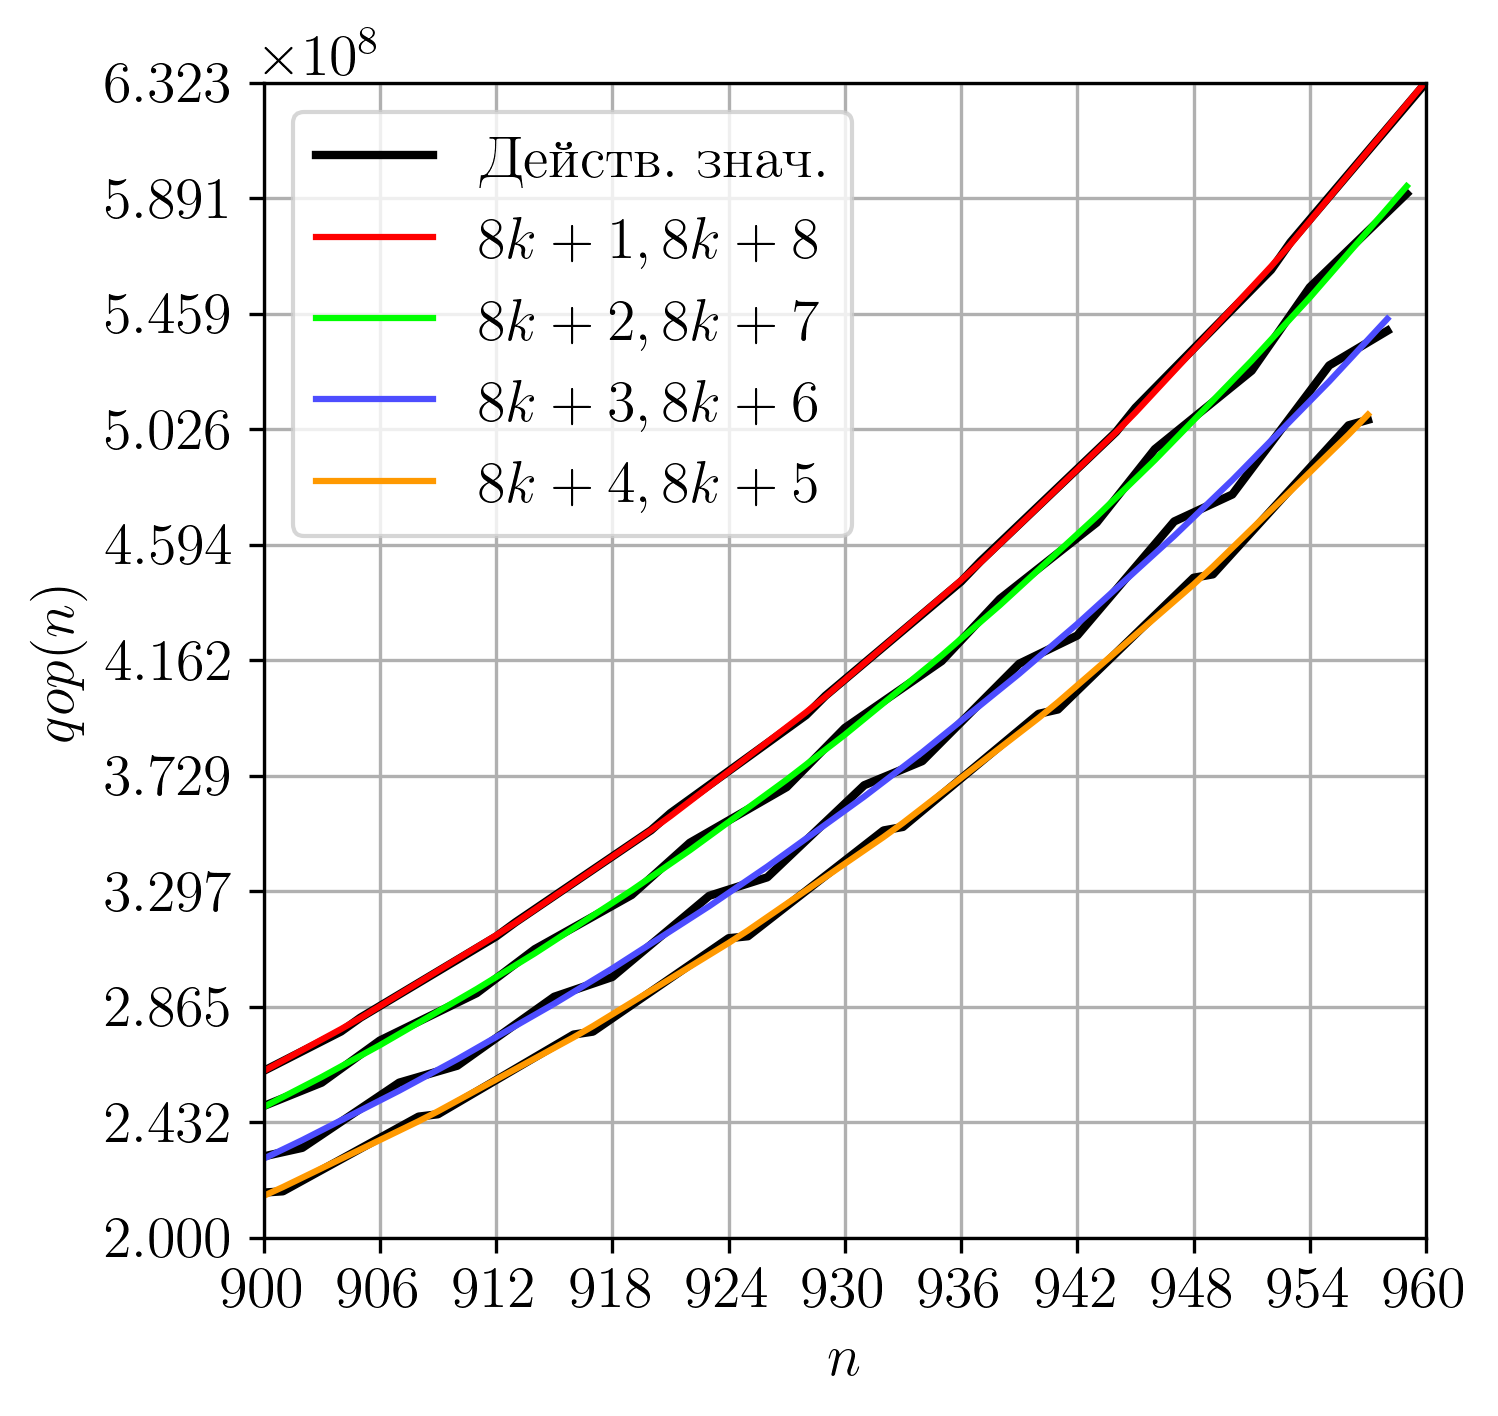

In [21]:
maxX1 = 900
maxY1 = 200000000
maxX2 = int(np.max(qopX))    
maxY2 = int(np.max(qopY))

step1X = (maxX2 - maxX1) // 10
step1Y = (maxY2 - maxY1) // 10

if step1X < 1:
    step1X = 1

if step1Y < 1:
    step1Y = 1
    
fig, ax = plt.subplots(figsize=(5, 5), dpi=300)
ax.set_xlim([maxX1, maxX2])
ax.set_ylim([maxY1, maxY2])
ax.xaxis.set_ticks(np.arange(maxX1, maxX2 + 1, step1X))
ax.yaxis.set_ticks(np.arange(maxY1, maxY2 + 1, step1Y))
ax.set_xlabel('$n$')
ax.set_ylabel('$qop(n)$')

ax.plot(q1X, q1Y, linewidth=2, color=(0, 0, 0), label='Действ. знач.')
ax.plot(q2X, q2Y, linewidth=2, color=(0, 0, 0))
ax.plot(q3X, q3Y, linewidth=2, color=(0, 0, 0))
ax.plot(q4X, q4Y, linewidth=2, color=(0, 0, 0))

ax.plot(q1X, q1Ya, linewidth=1.5, color=(1, 0, 0), label='$8k+1, 8k+8$')
ax.plot(q2X, q2Ya, linewidth=1.5, color=(0, 1, 0), label='$8k+2, 8k+7$')
ax.plot(q3X, q3Ya, linewidth=1.5, color=(0.3, 0.3, 1), label='$8k+3, 8k+6$')
ax.plot(q4X, q4Ya, linewidth=1.5, color=(1, 0.6, 0), label='$8k+4, 8k+5$')

ax.grid(True)
ax.legend()

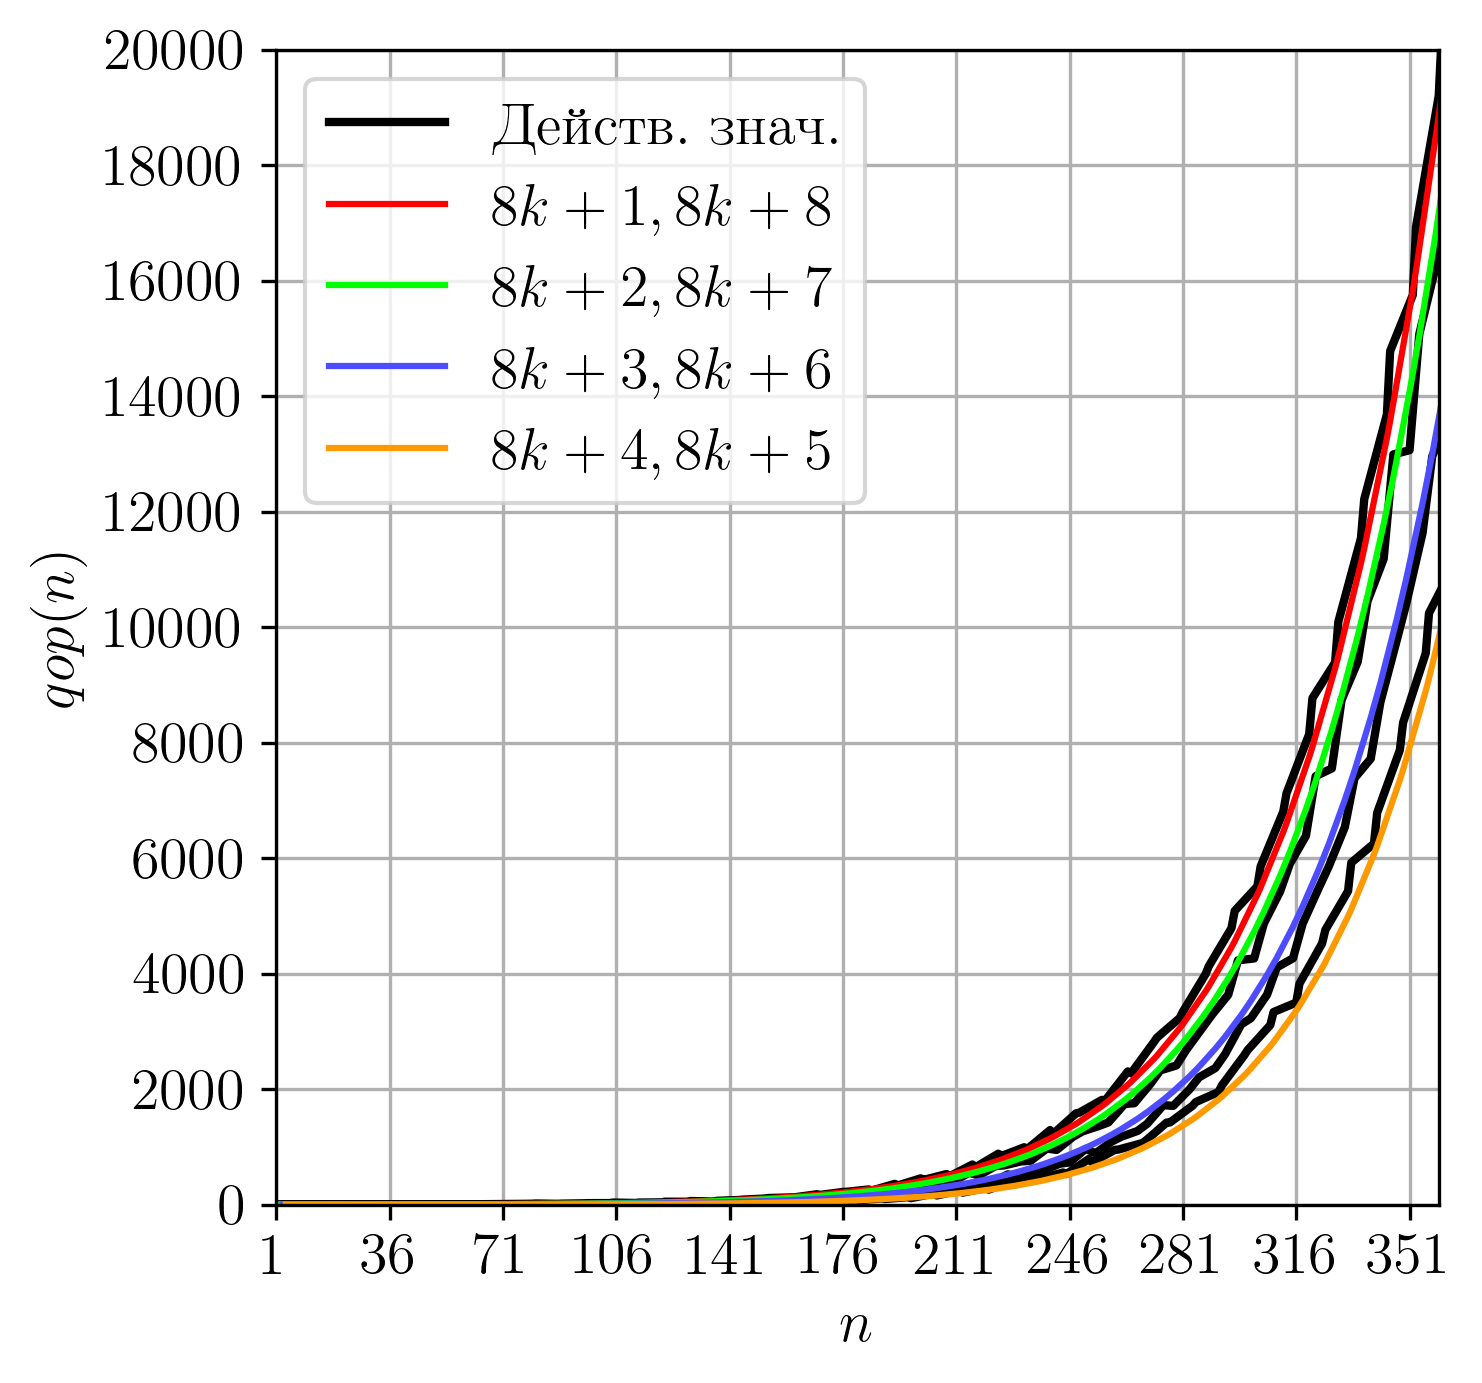

In [22]:
maxX1 = 1
maxY1 = 0
maxX2 = 360
maxY2 = 20000

step1X = (maxX2 - maxX1) // 10
step1Y = (maxY2 - maxY1) // 10

if step1X < 1:
    step1X = 1

if step1Y < 1:
    step1Y = 1
    
fig, ax = plt.subplots(figsize=(5, 5), dpi=300)
ax.set_xlim([maxX1, maxX2])
ax.set_ylim([maxY1, maxY2])
ax.xaxis.set_ticks(np.arange(maxX1, maxX2 + 1, step1X))
ax.yaxis.set_ticks(np.arange(maxY1, maxY2 + 1, step1Y))
ax.set_xlabel('$n$')
ax.set_ylabel('$qop(n)$')

ax.plot(q1X, q1Y, linewidth=2, color=(0, 0, 0), label='Действ. знач.')
ax.plot(q2X, q2Y, linewidth=2, color=(0, 0, 0))
ax.plot(q3X, q3Y, linewidth=2, color=(0, 0, 0))
ax.plot(q4X, q4Y, linewidth=2, color=(0, 0, 0))

ax.plot(q1X, q1Ya, linewidth=1.5, color=(1, 0, 0), label='$8k+1, 8k+8$')
ax.plot(q2X, q2Ya, linewidth=1.5, color=(0, 1, 0), label='$8k+2, 8k+7$')
ax.plot(q3X, q3Ya, linewidth=1.5, color=(0.3, 0.3, 1), label='$8k+3, 8k+6$')
ax.plot(q4X, q4Ya, linewidth=1.5, color=(1, 0.6, 0), label='$8k+4, 8k+5$')

ax.grid(True)
ax.legend()

In [23]:
data = np.zeros(0)
d1 = np.zeros(961, dtype=np.uint64)
d2 = np.zeros(961, dtype=np.uint64) 
d3 = np.zeros(961, dtype=np.uint64)
d4 = np.zeros(961, dtype=np.uint64)

i = 0
for u in q1X:
    d1[int(u)] = q1Ya[i]
    i = i + 1
    
i = 0
for u in q2X:
    d2[int(u)] = q2Ya[i]
    i = i + 1

i = 0
for u in q3X:
    d3[int(u)] = q3Ya[i]
    i = i + 1    
    
i = 0
for u in q4X:
    d4[int(u)] = q4Ya[i]
    i = i + 1

for i, item in enumerate(qopX):
    data = np.append(data, item)
    
    d = d1[i + 1] + d2[i + 1] + d3[i + 1] + d4[i + 1]
    if int(d) == int(qopY[i]):
        data = np.append(data, float('{:.2f}'.format(0)))  
    elif int(qopY[i]) == 0:
        data = np.append(data, float('{:.2f}'.format(100)))
    else:
        data = np.append(data, float('{:.2f}'.format((100 * abs(int(d) - int(qopY[i]))) / int(qopY[i]))))

data = data.reshape(len(qopX), 2)
df = pd.DataFrame(data, columns=['n', 'Аппроксимация, %'])
df

,n,"Аппроксимация, %"
0,1.0,800.00
1,2.0,100.00
2,3.0,0.00
3,4.0,0.00
4,5.0,0.00
5,6.0,0.00
6,7.0,0.00
7,8.0,100.00
8,9.0,0.00
9,10.0,100.00


In [24]:
RUR = np.zeros(0)
RURx = np.zeros(0)

f = 0
for i, item in enumerate(qopX):
    f = f + 1
    if f != 1:
        if f > 6:
            f = 0
        continue
        
    RURx = np.append(RURx, item)
    d = d1[i + 1] + d2[i + 1] + d3[i + 1] + d4[i + 1]
    if int(d) == int(qopY[i]):
        RUR = np.append(RUR, float('{:.2f}'.format(0)))  
    elif int(qopY[i]) == 0:
        RUR = np.append(RUR, float('{:.2f}'.format(100)))
    else:
        RUR = np.append(RUR, float('{:.2f}'.format((100 * abs(int(d) - int(qopY[i]))) / int(qopY[i]))))

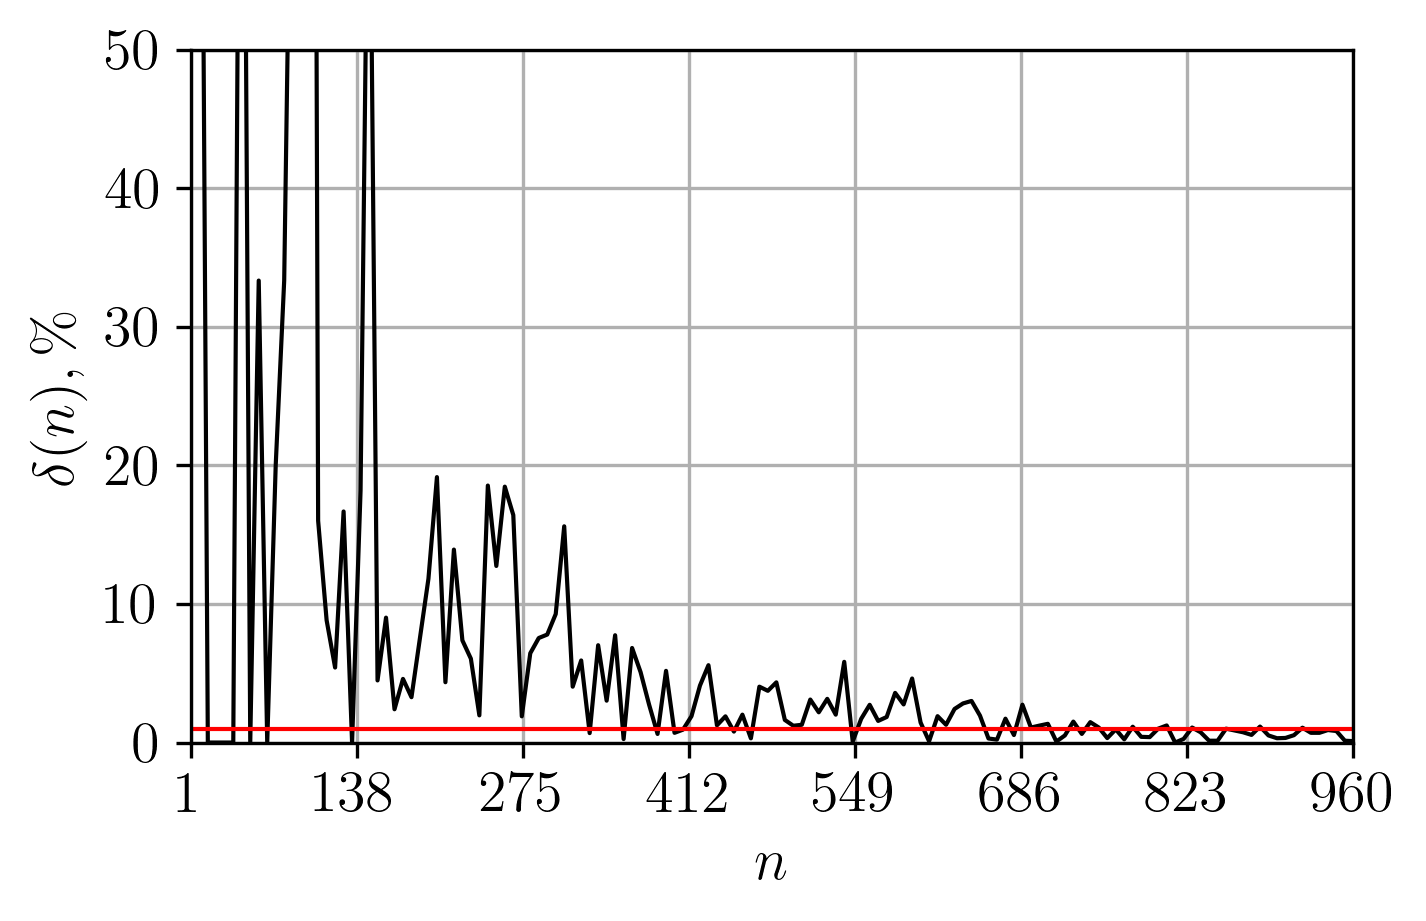

In [25]:
maxX1 = 1
maxY1 = 0
maxX2 = 960  
maxY2 = 50

step1X = (maxX2 - maxX1) // 7
step1Y = (maxY2 - maxY1) // 5

if step1X < 1:
    step1X = 1

if step1Y < 1:
    step1Y = 1
    
fig, ax = plt.subplots(figsize=(5, 3), dpi=300)
ax.set_xlim([maxX1, maxX2])
ax.set_ylim([maxY1, maxY2])
ax.xaxis.set_ticks(np.arange(maxX1, maxX2 + 1, step1X))
ax.yaxis.set_ticks(np.arange(maxY1, maxY2 + 1, step1Y))
ax.set_xlabel('$n$')
ax.set_ylabel('$\delta(n), \%$')
ax.plot(RURx, RUR, linewidth=1, color=(0, 0, 0))
ax.plot((0, 960), (1, 1), linewidth=1, color=(1, 0, 0))
ax.grid(True)